<a href="https://colab.research.google.com/github/Swapnadeepgit/ML_Classification_Algo/blob/main/catdog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Swapnadeep Ghosh (Data Science intern at Bharat Intern)

TASK NO.3 - Develop an image classification model to distinguish  betweeen images of cats and dogs using data science techniques in python ( The Problem Statement)

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:11<00:00, 110MB/s]
100% 1.06G/1.06G [00:11<00:00, 101MB/s]


In [ ]:
#importing the zip file
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()


In [ ]:
#importing the neccesary libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, MaxPooling2D,Dropout


In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
def process (image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)



In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding = 'valid',activation='relu',input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding = 'valid',activation='relu',input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding = 'valid',activation='relu',input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics = ['accuracy'])


In [ ]:
history = model.fit(train_ds,epochs = 1, validation_data = validation_ds)

625/625 [==============================] - 3572s 6s/step - loss: 0.3654 - accuracy: 0.8344 - val_loss: 0.4900 - val_accuracy: 0.7828


In [ ]:
import cv2

In [ ]:
test_image = cv2.imread('/content/cat.jpg')


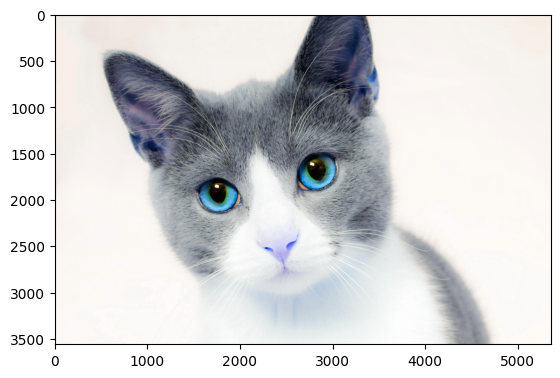

In [ ]:
plt.imshow(test_image)

In [ ]:
test_image.shape
test_image = cv2.resize(test_image,(256,256))
test_input = test_image.reshape(1,256,256,3)
pred = model.predict(test_input)


1/1 [==============================] - 0s 212ms/step


In [ ]:
if pred == 0 :
  print("it's a Cat")
else:
  print("it's a Dog")

it's a Cat


Completion of the task, Thank you.

In [ ]:
test_image = cv2.imread('/content/dog.jpg')

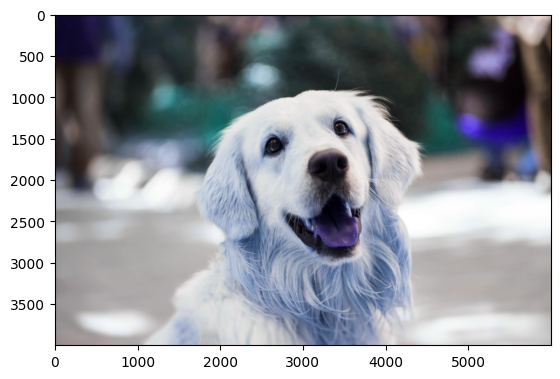

In [ ]:
plt.imshow(test_image)

In [ ]:
test_image.shape
test_image = cv2.resize(test_image,(256,256))
test_input = test_image.reshape(1,256,256,3)
pred = model.predict(test_input)

1/1 [==============================] - 0s 68ms/step


In [ ]:
if pred == 0 :
  print("it's a Cat")
else:
  print("it's a Dog")

it's a Dog
